In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [5]:
def all_plotter(optim_name, HL1_sparsity, HL2_sparsity, HL3_sparsity, HL4_sparsity, HL5_sparsity, 
                HL1_selectivity, HL2_selectivity, HL3_selectivity, HL4_selectivity, HL5_selectivity, 
                HL1_selectivity_std, HL2_selectivity_std, HL3_selectivity_std, HL4_selectivity_std, HL5_selectivity_std, 
                HL1_acc, HL2_acc, HL3_acc, HL4_acc, HL5_acc, 
                location='best', skip_5H=True):
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
    
    extract_HL1_acc = HL1_acc[-1]
    extract_HL2_acc = HL2_acc[-1]
    extract_HL3_acc = HL3_acc[-1]
    extract_HL4_acc = HL4_acc[-1]
    accs = [extract_HL1_acc, extract_HL2_acc, extract_HL3_acc, extract_HL4_acc]
    if skip_5H==False:
        extract_HL5_acc = HL5_acc[-1]
        accs = [extract_HL1_acc, extract_HL2_acc, extract_HL3_acc, extract_HL4_acc, extract_HL5_acc]
    
    extract_HL1_spar = HL1_sparsity[-1]
    extract_HL2_spar = HL2_sparsity[-1]
    extract_HL3_spar = HL3_sparsity[-1]
    extract_HL4_spar = HL4_sparsity[-1]
    spars = [extract_HL1_spar, extract_HL2_spar, extract_HL3_spar, extract_HL4_spar]
    if skip_5H==False:
        extract_HL5_spar = HL5_sparsity[-1]
        spars = [extract_HL1_spar, extract_HL2_spar, extract_HL3_spar, extract_HL4_spar, extract_HL5_spar]
    
    extract_HL1_selec = HL1_selectivity[-1]
    extract_HL2_selec = HL2_selectivity[-1]
    extract_HL3_selec = HL3_selectivity[-1]
    extract_HL4_selec = HL4_selectivity[-1]
    selecs = [extract_HL1_selec, extract_HL2_selec, extract_HL3_selec, extract_HL4_selec]
    if skip_5H==False:
        extract_HL5_selec = HL5_selectivity[-1]
        selecs = [extract_HL1_selec, extract_HL2_selec, extract_HL3_selec, extract_HL4_selec, extract_HL5_selec]
    
    extract_HL1_selec_std = HL1_selectivity_std[-1]
    extract_HL2_selec_std = HL2_selectivity_std[-1]
    extract_HL3_selec_std = HL3_selectivity_std[-1]
    extract_HL4_selec_std = HL4_selectivity_std[-1]
    selecs_std = [extract_HL1_selec_std, extract_HL2_selec_std, extract_HL3_selec_std, extract_HL4_selec_std]
    if skip_5H==False:
        extract_HL5_selec_std = HL5_selectivity_std[-1]
        selecs_std = [extract_HL1_selec_std, extract_HL2_selec_std, extract_HL3_selec_std, extract_HL4_selec_std, extract_HL5_selec_std]
    
    if skip_5H==False:
        hl_ticks = ['1HL', '2HLs', '3HLs', '4HLs', '5HLs']
        ax1.set_xticks(np.linspace(1, 5, 5))
        ax1.set_xticklabels(hl_ticks)

        ax2.set_xticks(np.linspace(1, 5, 5))
        ax2.set_xticklabels(hl_ticks)

        ax3.set_xticks(np.linspace(1, 5, 5))
        ax3.set_xticklabels(hl_ticks)
    
    if skip_5H==True:
        hl_ticks = ['1HL', '2HLs', '3HLs', '4HLs']
        ax1.set_xticks(np.linspace(1, 4, 4))
        ax1.set_xticklabels(hl_ticks)

        ax2.set_xticks(np.linspace(1, 4, 4))
        ax2.set_xticklabels(hl_ticks)

        ax3.set_xticks(np.linspace(1, 4, 4))
        ax3.set_xticklabels(hl_ticks)
    
    if skip_5H==False:
        # accuracy 
        ax1.scatter(np.linspace(1, 5, 5), accs, label=f'accuracy {optim_name}')
        # sparsity 
        ax2.scatter(np.linspace(1, 5, 5), spars, label=f'sparsity {optim_name}')
        # selectivity
        ax3.errorbar(np.linspace(1, 5, 5), selecs, selecs_std, fmt='o', label=f'selectivity {optim_name}')
    
    if skip_5H==True:
        # accuracy 
        ax1.scatter(np.linspace(1, 4, 4), accs, label=f'accuracy {optim_name}')
        # sparsity 
        ax2.scatter(np.linspace(1, 4, 4), spars, label=f'sparsity {optim_name}')
        # selectivity
        ax3.errorbar(np.linspace(1, 4, 4), selecs, selecs_std, fmt='o', label=f'selectivity {optim_name}')
    
    # setting legends
    ax1.legend(loc=location)
    ax2.legend(loc=location)
    ax3.legend(loc=location)
    
    # setting titles 
    ax1.set_title('accuracy')
    ax2.set_title('sparsity')
    ax3.set_title('selectivity')
    
    # setting y_lim
    ax1.set_ylim([0.9,1.1]) # accuracy 
    ax2.set_ylim([-0.1,1.1])
    ax3.set_ylim([-0.1,1.1])
    
    ax1.grid()
    ax2.grid()
    ax3.grid()
    
    plt.show()
    
    return accs, spars, selecs, selecs_std

# Graph format

In [6]:
def plotter(optimizer_name, skip_5H=True):
    sparsity_avg_HL1 = sparsity_val_extractor(f'1HL_sparsity_{optimizer_name}.txt')
    sparsity_avg_HL2 = sparsity_val_extractor(f'2HL_sparsity_{optimizer_name}.txt')
    sparsity_avg_HL3 = sparsity_val_extractor(f'3HL_sparsity_{optimizer_name}.txt')
    sparsity_avg_HL4 = sparsity_val_extractor(f'4HL_sparsity_{optimizer_name}.txt')
    sparsity_avg_HL5 = sparsity_val_extractor(f'5HL_sparsity_{optimizer_name}.txt')

    selectivity_avg_HL1, selectivity_std_HL1 = selectivity_val_extractor(f'1HL_selectivity_{optimizer_name}.txt')
    selectivity_avg_HL2, selectivity_std_HL2 = selectivity_val_extractor(f'2HL_selectivity_{optimizer_name}.txt')
    selectivity_avg_HL3, selectivity_std_HL3 = selectivity_val_extractor(f'3HL_selectivity_{optimizer_name}.txt')
    selectivity_avg_HL4, selectivity_std_HL4 = selectivity_val_extractor(f'4HL_selectivity_{optimizer_name}.txt')
    selectivity_avg_HL5, selectivity_std_HL5 = selectivity_val_extractor(f'5HL_selectivity_{optimizer_name}.txt')

    test_HL1 = test_val_extractor(f'1HL_sparsity_{optimizer_name}.txt')
    test_HL2 = test_val_extractor(f'2HL_sparsity_{optimizer_name}.txt')
    test_HL3 = test_val_extractor(f'3HL_sparsity_{optimizer_name}.txt')
    test_HL4 = test_val_extractor(f'4HL_sparsity_{optimizer_name}.txt')
    test_HL5 = test_val_extractor(f'5HL_sparsity_{optimizer_name}.txt')
    
    if skip_5H == False:
        # Adadelta, Adam
        acc, spar, selec_avg, selec_std = all_plotter(optimizer_name, sparsity_avg_HL1, sparsity_avg_HL2, sparsity_avg_HL3, sparsity_avg_HL4, sparsity_avg_HL5,
                    selectivity_avg_HL1, selectivity_avg_HL2, selectivity_avg_HL3, selectivity_avg_HL4, selectivity_avg_HL5,
                    selectivity_std_HL1, selectivity_std_HL2, selectivity_std_HL3, selectivity_std_HL4, selectivity_std_HL5,
                    test_HL1, test_HL2, test_HL3, test_HL4, test_HL5, skip_5H=False)
        
    else: 
        # SGD, Adagrad
        acc, spar, selec_avg, selec_std = all_plotter(optimizer_name, sparsity_avg_HL1, sparsity_avg_HL2, sparsity_avg_HL3, sparsity_avg_HL4, _,
                    selectivity_avg_HL1, selectivity_avg_HL2, selectivity_avg_HL3, selectivity_avg_HL4, _,
                    selectivity_std_HL1, selectivity_std_HL2, selectivity_std_HL3, selectivity_std_HL4, _,
                    test_HL1, test_HL2, test_HL3, test_HL4, _, skip_5H=True)
        
    return acc, spar, selec_avg, selec_std

# Draw all at once

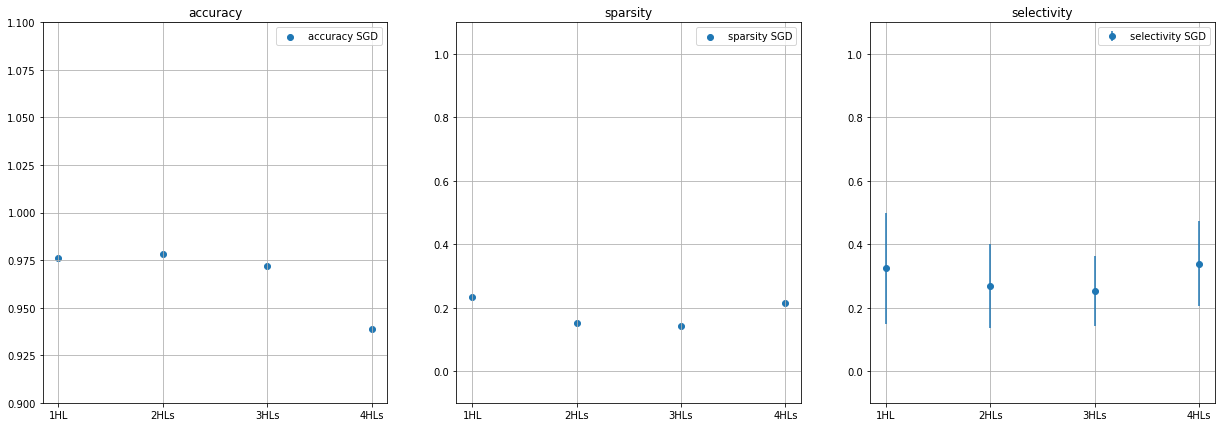

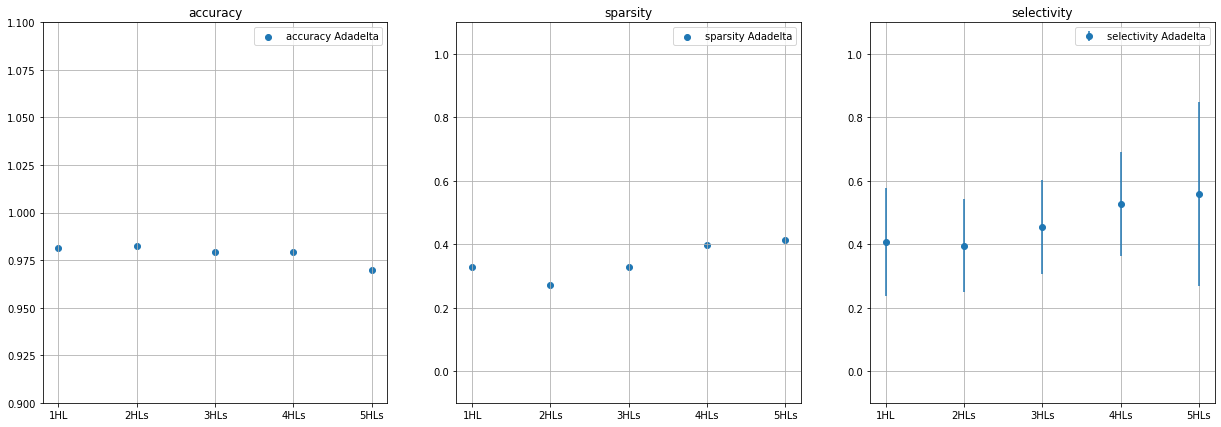

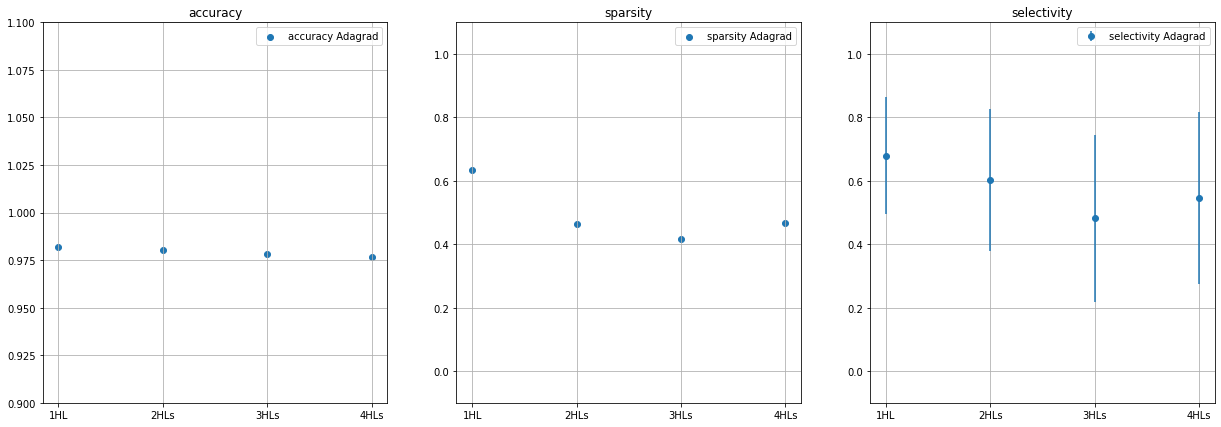

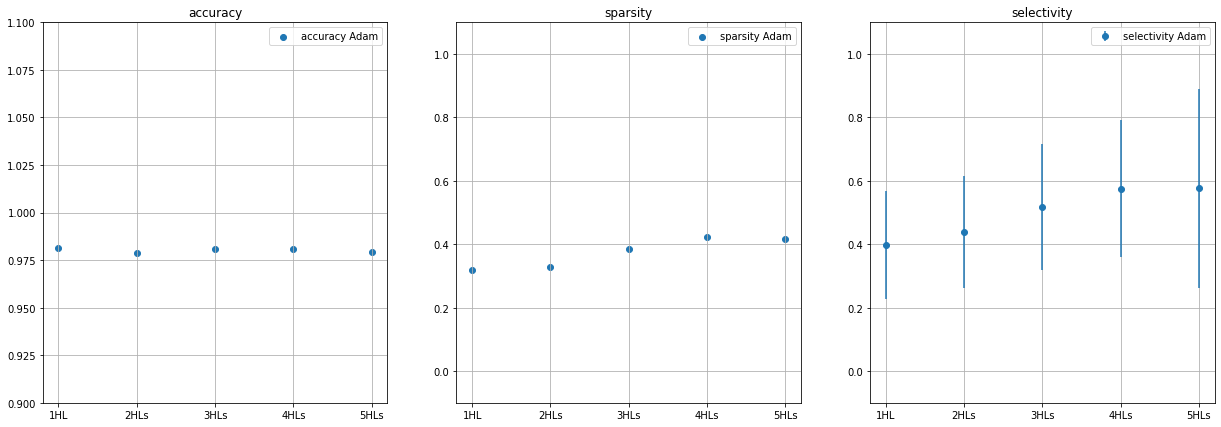

In [7]:
sgd_acc,      sgd_spar,      sgd_selec_avg,      sgd_selec_std      = plotter('SGD', skip_5H=True)
adadelta_acc, adadelta_spar, adadelta_selec_avg, adadelta_selec_std = plotter('Adadelta', skip_5H=False)
adagrad_acc,  adagrad_spar,  adagrad_selec_avg,  adagrad_selec_std  = plotter('Adagrad', skip_5H=True)
adam_acc,     adam_spar,     adam_selec_avg,     adam_selec_std     = plotter('Adam', skip_5H=False)

# make all variable length 5 
sgd_acc.append(-999)
sgd_spar.append(-999)
sgd_selec_avg.append(-999)
sgd_selec_std.append(0)

adagrad_acc.append(-999)
adagrad_spar.append(-999)
adagrad_selec_avg.append(-999)
adagrad_selec_std.append(0)

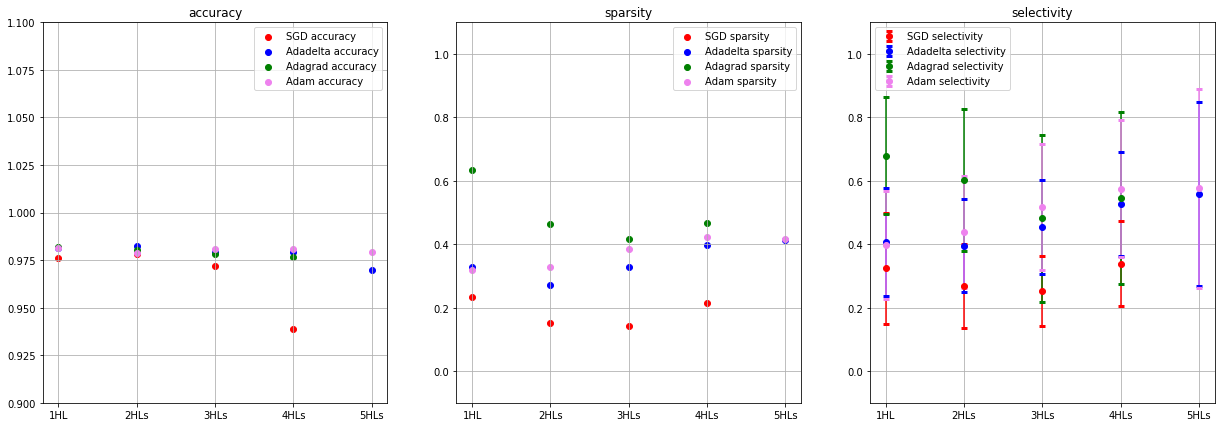

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# default setting for grpahs 
hl_ticks = ['1HL', '2HLs', '3HLs', '4HLs', '5HLs']
ax1.set_xticks(np.linspace(1, 5, 5))
ax1.set_xticklabels(hl_ticks)

ax2.set_xticks(np.linspace(1, 5, 5))
ax2.set_xticklabels(hl_ticks)

ax3.set_xticks(np.linspace(1, 5, 5))
ax3.set_xticklabels(hl_ticks)

# accuracy
ax1.scatter(np.linspace(1, 5, 5), sgd_acc, label='SGD accuracy', c='red')
ax1.scatter(np.linspace(1, 5, 5), adadelta_acc, label='Adadelta accuracy', c='blue')
ax1.scatter(np.linspace(1, 5, 5), adagrad_acc, label='Adagrad accuracy', c='green')
ax1.scatter(np.linspace(1, 5, 5), adam_acc, label='Adam accuracy', c='violet')

# sparsity
ax2.scatter(np.linspace(1, 5, 5), sgd_spar, label='SGD sparsity', c='red')
ax2.scatter(np.linspace(1, 5, 5), adadelta_spar, label='Adadelta sparsity', c='blue')
ax2.scatter(np.linspace(1, 5, 5), adagrad_spar, label='Adagrad sparsity', c='green')
ax2.scatter(np.linspace(1, 5, 5), adam_spar, label='Adam sparsity', c='violet')

# selectivity
ax3.errorbar(np.linspace(1, 5, 5), sgd_selec_avg, sgd_selec_std, capsize=3, capthick=3, fmt='o', label='SGD selectivity', c='red')
ax3.errorbar(np.linspace(1, 5, 5), adadelta_selec_avg, adadelta_selec_std, capsize=3, capthick=3, fmt='o', label='Adadelta selectivity', c='blue')
ax3.errorbar(np.linspace(1, 5, 5), adagrad_selec_avg, adagrad_selec_std, capsize=3, capthick=3, fmt='o', label='Adagrad selectivity', c='green')
ax3.errorbar(np.linspace(1, 5, 5), adam_selec_avg, adam_selec_std, capsize=3, capthick=3, fmt='o', label='Adam selectivity', c='violet')

# setting legends
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

# setting titles 
ax1.set_title('accuracy')
ax2.set_title('sparsity')
ax3.set_title('selectivity')

# setting y_lim
ax1.set_ylim([0.9,1.1]) # accuracy 
ax2.set_ylim([-0.1,1.1])
ax3.set_ylim([-0.1,1.1])

ax1.grid()
ax2.grid()
ax3.grid()

plt.show()


# SGD

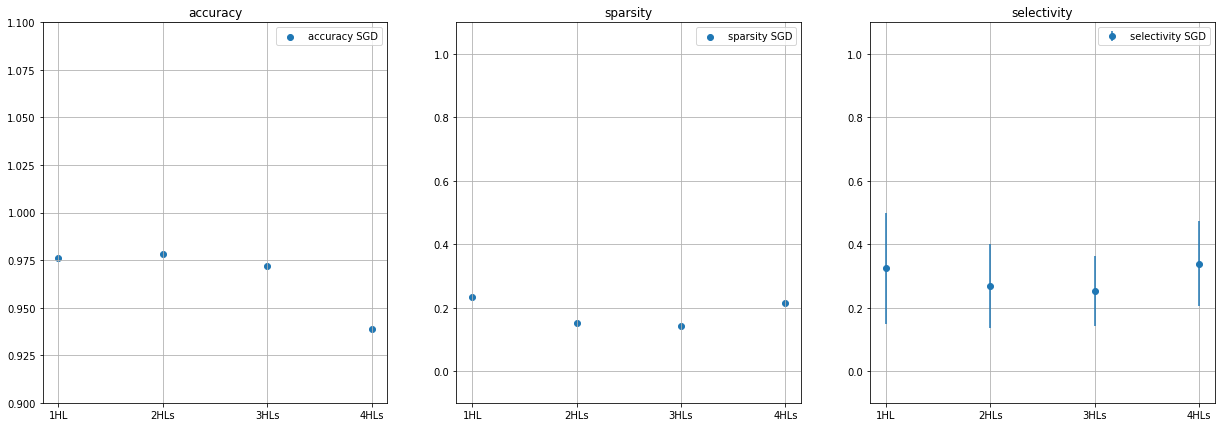

([0.9761, 0.978, 0.9721, 0.9388],
 [0.23481406271457672,
  0.15165816992521286,
  0.14190143470962843,
  0.21408026479184628],
 [0.3242375345942012,
  0.26816373596407184,
  0.2518164313488776,
  0.3389368644008299],
 [0.1755363009460899,
  0.13245347668026336,
  0.1111627858424115,
  0.1347128479926586])

In [9]:
plotter('SGD', skip_5H=True)

# Adadelta 

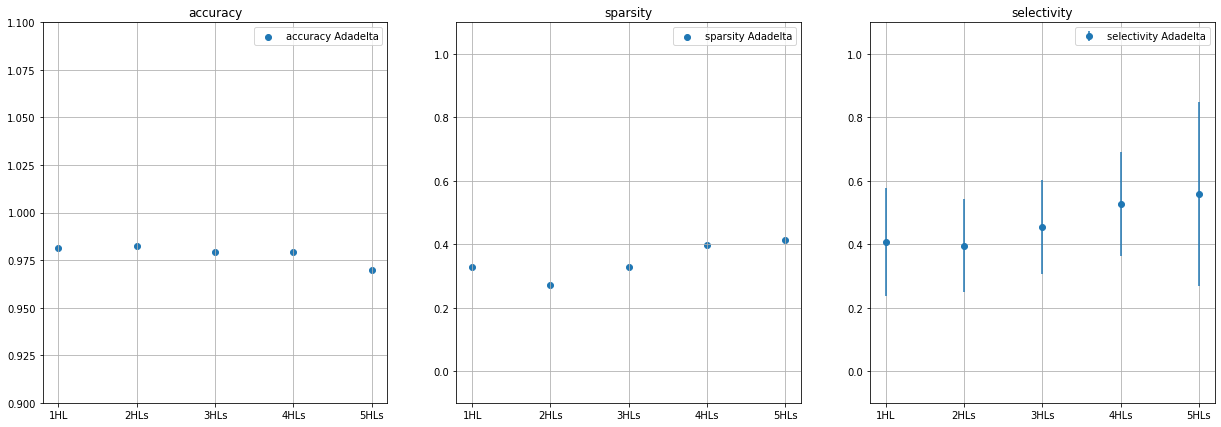

([0.9816, 0.9822, 0.9794, 0.9794, 0.9698],
 [0.3273734748363495,
  0.27216053754091263,
  0.32799873252709705,
  0.3973778523504734,
  0.41432845294475557],
 [0.4064039921399227,
  0.3953947918544104,
  0.4552025719622697,
  0.5272032021397257,
  0.5576098796430415],
 [0.17079207861853338,
  0.1457882712041961,
  0.14767973473859716,
  0.16291140252864494,
  0.29007573243106866])

In [10]:
plotter('Adadelta', skip_5H=False)

# Adagrad

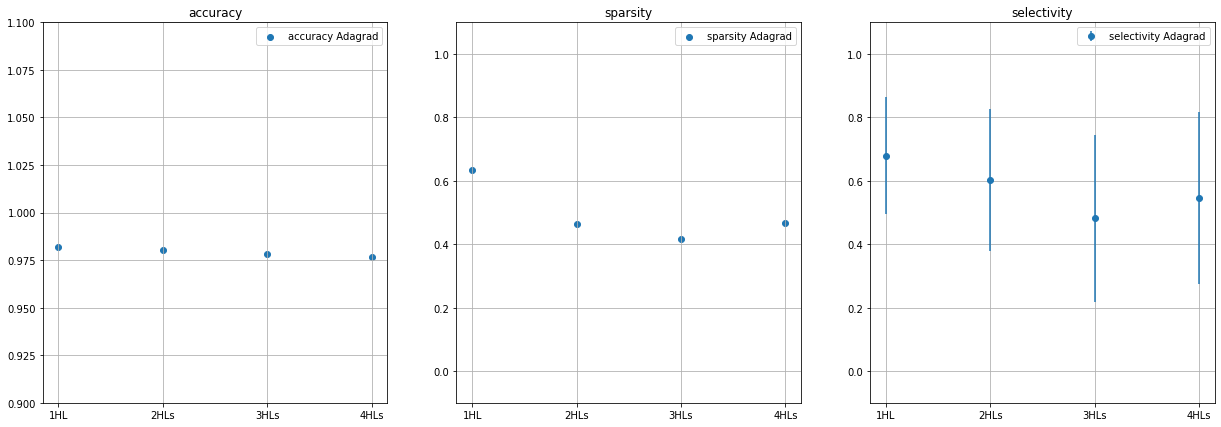

([0.9817, 0.9802, 0.9784, 0.9764],
 [0.6339491009712219,
  0.46516887843608856,
  0.41782883803049725,
  0.4666415601968765],
 [0.6793988484312553,
  0.6022726783760297,
  0.4819164867032418,
  0.5457738229147955],
 [0.18401760931093908,
  0.22414562590385612,
  0.2634203282771424,
  0.2715855070362495])

In [11]:
plotter('Adagrad', skip_5H=True)

# Adam

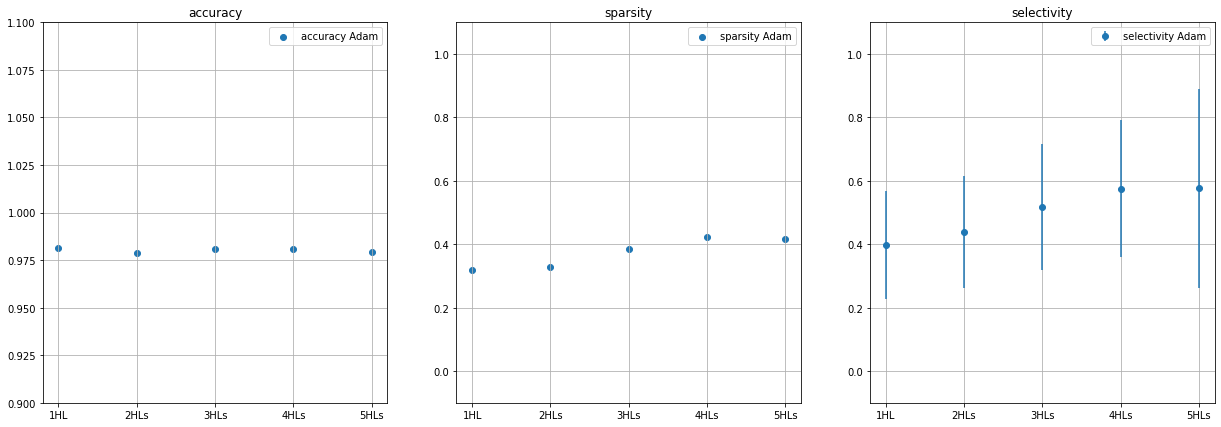

([0.9815, 0.9786, 0.9806, 0.981, 0.9791],
 [0.3192981779575348,
  0.3274378031492233,
  0.3837879200776418,
  0.42194611579179764,
  0.4176055073738098],
 [0.3986166128964334,
  0.4382456221041422,
  0.5168629456939063,
  0.5755105879379558,
  0.5761671790693499],
 [0.16971013762446083,
  0.17656196317830902,
  0.19829132709662836,
  0.21541511577944583,
  0.31271059657672196])

In [12]:
plotter('Adam', skip_5H=False)

In [13]:
def preprocess_compare(optimizer_name, skip_5H=True):
    sparsity_avg_HL1 = sparsity_val_extractor(f'1HL_sparsity_{optimizer_name}.txt')
    sparsity_avg_HL2 = sparsity_val_extractor(f'2HL_sparsity_{optimizer_name}.txt')
    sparsity_avg_HL3 = sparsity_val_extractor(f'3HL_sparsity_{optimizer_name}.txt')
    sparsity_avg_HL4 = sparsity_val_extractor(f'4HL_sparsity_{optimizer_name}.txt')
    sparsity_avg_HL5 = sparsity_val_extractor(f'5HL_sparsity_{optimizer_name}.txt')

    selectivity_avg_HL1, selectivity_std_HL1 = selectivity_val_extractor(f'1HL_selectivity_{optimizer_name}.txt')
    selectivity_avg_HL2, selectivity_std_HL2 = selectivity_val_extractor(f'2HL_selectivity_{optimizer_name}.txt')
    selectivity_avg_HL3, selectivity_std_HL3 = selectivity_val_extractor(f'3HL_selectivity_{optimizer_name}.txt')
    selectivity_avg_HL4, selectivity_std_HL4 = selectivity_val_extractor(f'4HL_selectivity_{optimizer_name}.txt')
    selectivity_avg_HL5, selectivity_std_HL5 = selectivity_val_extractor(f'5HL_selectivity_{optimizer_name}.txt')

    test_HL1 = test_val_extractor(f'1HL_sparsity_{optimizer_name}.txt')
    test_HL2 = test_val_extractor(f'2HL_sparsity_{optimizer_name}.txt')
    test_HL3 = test_val_extractor(f'3HL_sparsity_{optimizer_name}.txt')
    test_HL4 = test_val_extractor(f'4HL_sparsity_{optimizer_name}.txt')
    test_HL5 = test_val_extractor(f'5HL_sparsity_{optimizer_name}.txt')
    
    if skip_5H==True:
        return sparsity_avg_HL1, sparsity_avg_HL4, selectivity_avg_HL1, selectivity_avg_HL4, selectivity_std_HL1, selectivity_std_HL4, test_HL1, test_HL4
    
    else:
        return sparsity_avg_HL1, sparsity_avg_HL5, selectivity_avg_HL1, selectivity_avg_HL5, selectivity_std_HL1, selectivity_std_HL5, test_HL1, test_HL5

In [14]:
def compare(optimizer_name, skip_5H=True):
    if skip_5H==True:
        sparsity_avg_HL1, sparsity_avg_HL, selectivity_avg_HL1, selectivity_avg_HL, selectivity_std_HL1, selectivity_std_HL, test_HL1, test_HL = preprocess_compare(optimizer_name, skip_5H=True)
    if skip_5H==False:
        sparsity_avg_HL1, sparsity_avg_HL, selectivity_avg_HL1, selectivity_avg_HL, selectivity_std_HL1, selectivity_std_HL, test_HL1, test_HL = preprocess_compare(optimizer_name, skip_5H=False)
    print(f'\n==============={optimizer_name}===============')
    if skip_5H==True:
        print(f"{optimizer_name} 1HL: Test acc={test_HL1[-1]:.3f}, Spar={sparsity_avg_HL1[-1]:.3f}, Selec avg={selectivity_avg_HL1[-1]:.3f}, Selec std={selectivity_std_HL1[-1]:.3f}")
        print(f"{optimizer_name} 4HL: Test acc={test_HL[-1]:.3f}, Spar={sparsity_avg_HL[-1]:.3f}, Selec avg={selectivity_avg_HL[-1]:.3f}, Selec std={selectivity_std_HL[-1]:.3f}")
        print()
        print("test deviation: 4HLs - 1HL(original):", test_HL[-1] - test_HL1[-1])
        print("sparsity deviation: 4HLs - 1HL(original):", sparsity_avg_HL[-1] - sparsity_avg_HL1[-1])
        print("selectivity deviation: 4HLs - 1HL(original):", selectivity_avg_HL[-1] - selectivity_avg_HL1[-1])
        print()
        print("test % difference: 4HLs / 1HL(original):", (test_HL[-1] / test_HL1[-1]) * 100)
        print("sparsity % difference: 4HLs / 1HL(original):", (sparsity_avg_HL[-1] / sparsity_avg_HL1[-1]) * 100)
        print("selectivity % difference: 4HLs / 1HL(original):", (selectivity_avg_HL[-1] / selectivity_avg_HL1[-1]) * 100)
    
    if skip_5H==False:
        print(f"{optimizer_name} 1HL: Test acc={test_HL1[-1]:.3f}, Spar={sparsity_avg_HL1[-1]:.3f}, Selec avg={selectivity_avg_HL1[-1]:.3f}, Selec std={selectivity_std_HL1[-1]:.3f}")
        print(f"{optimizer_name} 5HL: Test acc={test_HL[-1]:.3f}, Spar={sparsity_avg_HL[-1]:.3f}, Selec avg={selectivity_avg_HL[-1]:.3f}, Selec std={selectivity_std_HL[-1]:.3f}")
        print()
        print("test deviation: 5HLs - 1HL(original):", test_HL[-1] - test_HL1[-1])
        print("sparsity deviation: 5HLs - 1HL(original):", sparsity_avg_HL[-1] - sparsity_avg_HL1[-1])
        print("selectivity deviation: 5HLs - 1HL(original):", selectivity_avg_HL[-1] - selectivity_avg_HL1[-1])
        print()
        print("test % difference: 5HLs / 1HL(original):", (test_HL[-1] / test_HL1[-1]) * 100)
        print("sparsity % difference: 5HLs / 1HL(original):", (sparsity_avg_HL[-1] / sparsity_avg_HL1[-1]) * 100)
        print("selectivity % difference: 5HLs / 1HL(original):", (selectivity_avg_HL[-1] / selectivity_avg_HL1[-1]) * 100)

In [15]:
# 50 epochs 
compare('SGD', skip_5H=True)
compare('Adadelta', skip_5H=False)
compare('Adagrad', skip_5H=True)
compare('Adam', skip_5H=False)


===============SGD===============
SGD 1HL: Test acc=0.976, Spar=0.235, Selec avg=0.324, Selec std=0.176
SGD 4HL: Test acc=0.939, Spar=0.214, Selec avg=0.339, Selec std=0.135

test deviation: 4HLs - 1HL(original): -0.0373
sparsity deviation: 4HLs - 1HL(original): -0.020733797922730446
selectivity deviation: 4HLs - 1HL(original): 0.014699329806628691

test % difference: 4HLs / 1HL(original): 96.17867021821534
sparsity % difference: 4HLs / 1HL(original): 91.1701208679597
selectivity % difference: 4HLs / 1HL(original): 104.53350653095288

===============Adadelta===============
Adadelta 1HL: Test acc=0.982, Spar=0.327, Selec avg=0.406, Selec std=0.171
Adadelta 5HL: Test acc=0.970, Spar=0.414, Selec avg=0.558, Selec std=0.290

test deviation: 5HLs - 1HL(original): -0.011800000000000033
sparsity deviation: 5HLs - 1HL(original): 0.08695497810840608
selectivity deviation: 5HLs - 1HL(original): 0.15120588750311886

test % difference: 5HLs / 1HL(original): 98.79788101059495
sparsity % difference